In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
sns.set_style('darkgrid')

In [ ]:
#Load Dataset

In [36]:
data = pd.read_csv('/content/SpotifyFeatures.csv')
data.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV         0.0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP         1.0         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy         3.0         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf         0.0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK         4.0         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0      99373.0   0.910             0.000  C#    0.3460    -1.828  Major   
1     137373.0   0.737             0.000  F#    0.1510    -5.559  Minor   
2     170267.0   0.131             0.000   C    0.1030   -13.879  Minor   
3     152427.0   0.326             0.000  C#    0.0985   -12.178  Major   
4      82625.0   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [37]:
#Basic EDA


In [38]:
data.info()
#the information contains the number of columns, column labels, column data types,
#memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58571 entries, 0 to 58570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             58571 non-null  object 
 1   artist_name       58571 non-null  object 
 2   track_name        58571 non-null  object 
 3   track_id          58571 non-null  object 
 4   popularity        58570 non-null  float64
 5   acousticness      58570 non-null  float64
 6   danceability      58570 non-null  float64
 7   duration_ms       58570 non-null  float64
 8   energy            58570 non-null  float64
 9   instrumentalness  58570 non-null  float64
 10  key               58570 non-null  object 
 11  liveness          58570 non-null  float64
 12  loudness          58570 non-null  float64
 13  mode              58570 non-null  object 
 14  speechiness       58570 non-null  float64
 15  tempo             58570 non-null  float64
 16  time_signature    58570 non-null  object

In [39]:
data.describe()
#Basic Statistic details about the data

#count tells us the number of NoN-empty rows in a feature.
#mean tells us the mean value of that feature.
#std tells us the Standard Deviation Value of that feature.
#min tells us the minimum value of that feature.
#25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
#max tells us the maximum value of that feature.


popularity  acousticness  danceability   duration_ms        energy  \
count  58570.000000  58570.000000  58570.000000  5.857000e+04  58570.000000   
mean      41.095936      0.263938      0.557182  2.392842e+05      0.643926   
std       16.389200      0.311484      0.156393  1.003218e+05      0.240600   
min        0.000000      0.000000      0.059200  1.721300e+04      0.000909   
25%       31.000000      0.013200      0.457000  1.928020e+05      0.477000   
50%       42.000000      0.110000      0.566000  2.268270e+05      0.681000   
75%       53.000000      0.455750      0.668000  2.690802e+05      0.848000   
max      100.000000      0.996000      0.987000  4.830606e+06      0.999000   

       instrumentalness      liveness      loudness   speechiness  \
count      58570.000000  58570.000000  58570.000000  58570.000000   
mean           0.140726      0.199969     -7.871117      0.077491   
std            0.285215      0.168271      4.429216      0.085074   
min            0.000000      0.009670    -43.025000      0.022300   
25%            0.000000      0.097000     -9.901000      0.034600   
50%            0.000166      0.130000     -6.842000      0.046400   
75%            0.055675      0.257000     -4.834000      0.078900   
max            0.997000      1.000000      3.744000      0.965000   

              tempo       valence  
count  58570.000000  58570.000000  
mean     122.117922      0.470635  
std       29.707920      0.243183  
min       32.080000      0.000000  
25%       98.786000      0.278000  
50%      120.948500      0.460000  
75%      141.259750      0.657000  
max      242.903000      1.000000

In [40]:
data.shape
##It shows the shape of the dataset ..(rows,columns)

(58571, 18)

In [11]:
data.columns
##it shows the all columns which are present in the dataset

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [41]:
#Data Cleaning
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
time_signature      1
valence             1
dtype: int64

In [43]:
data.dropna(inplace = True)

In [42]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
time_signature      1
valence             1
dtype: int64

In [44]:
#Convert Duration From ms To Sec
data['duration_sec'] = data['duration_ms'].apply(lambda x:round(x/1000))
data.drop(['duration_ms'],inplace = True,axis = 1)
data.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  energy  \
0  0BRjO6ga9RKCKjfDqeFgWV         0.0         0.611         0.389   0.910   
1  0BjC1NfoEOOusryehmNudP         1.0         0.246         0.590   0.737   
2  0CoSDzoNIKCRs124s9uTVy         3.0         0.952         0.663   0.131   
3  0Gc6TVm52BwZD07Ki6tIvf         0.0         0.703         0.240   0.326   
4  0IuslXpMROHdEPvSl1fTQK         4.0         0.950         0.331   0.225   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0             0.000  C#    0.3460    -1.828  Major       0.0525  166.969   
1             0.000  F#    0.1510    -5.559  Minor       0.0868  174.003   
2             0.000   C    0.1030   -13.879  Minor       0.0362   99.488   
3             0.000  C#    0.0985   -12.178  Major       0.0395  171.758   
4             0.123   F    0.2020   -21.150  Major       0.0456  140.576   

  time_signature  valence  duration_sec  
0            4/4    0.814            99  
1            4/4    0.816           137  
2            5/4    0.368           170  
3            4/4    0.227           152  
4            4/4    0.390            83

In [45]:
#Data Visualization
data.drop(['key','mode'],inplace = True ,axis = 1)


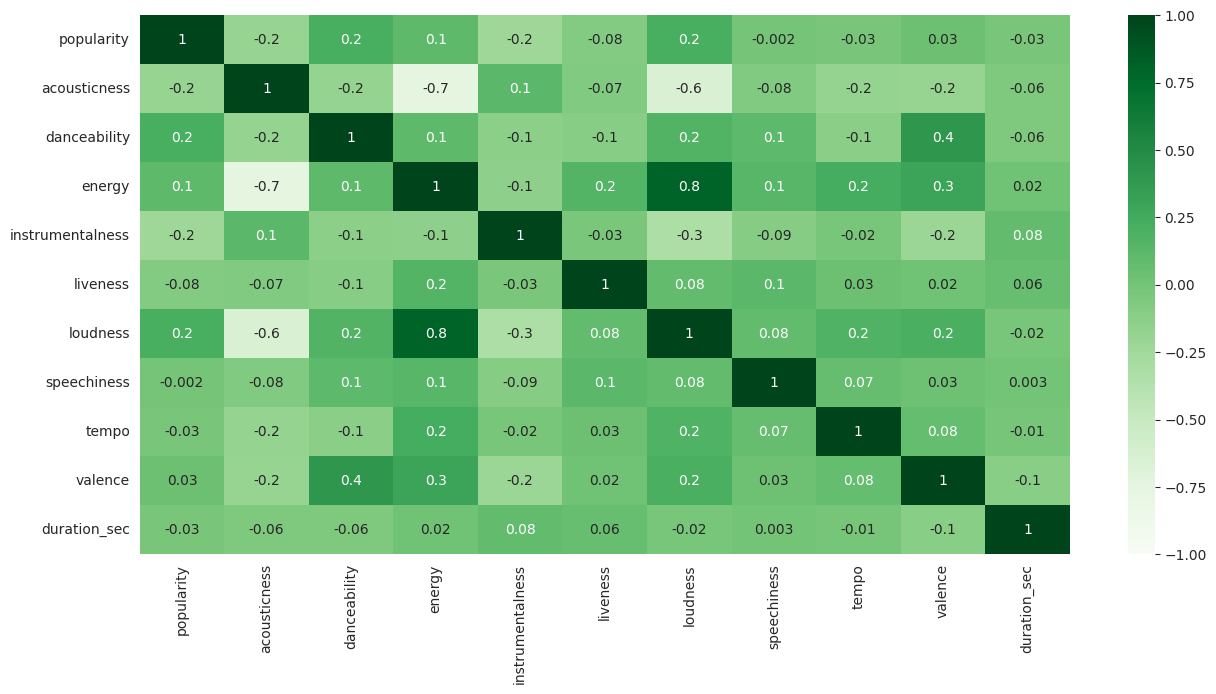

In [58]:
data_df = data.corr()
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(data_df,annot = True,fmt=".1g",vmin = -1,vmax = 1,cmap = 'Greens',linecolor = 'black')#fmt is string formatting code
heatmap.set_title = ("Heatmap Correaltion")
plt.show()

As we seen above that the strong positive correlation in between energy and loudness

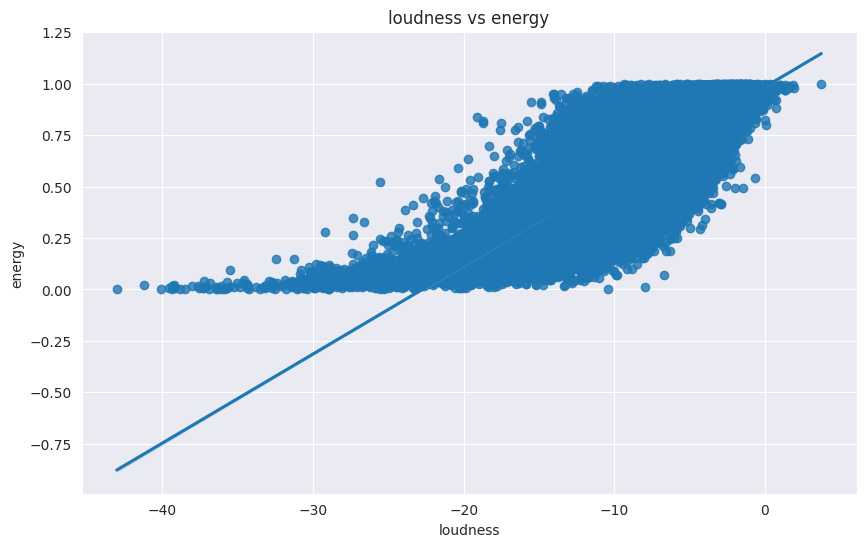

In [63]:


plt.figure(figsize=(10,6))
sns.regplot(data = data,x ='loudness',y ='energy' ).set(title ='loudness vs energy')
#This method is used to plot data and a linear regression model fit.
plt.show()

In [ ]:
#From Given Dataset take some columns to perform some visualization

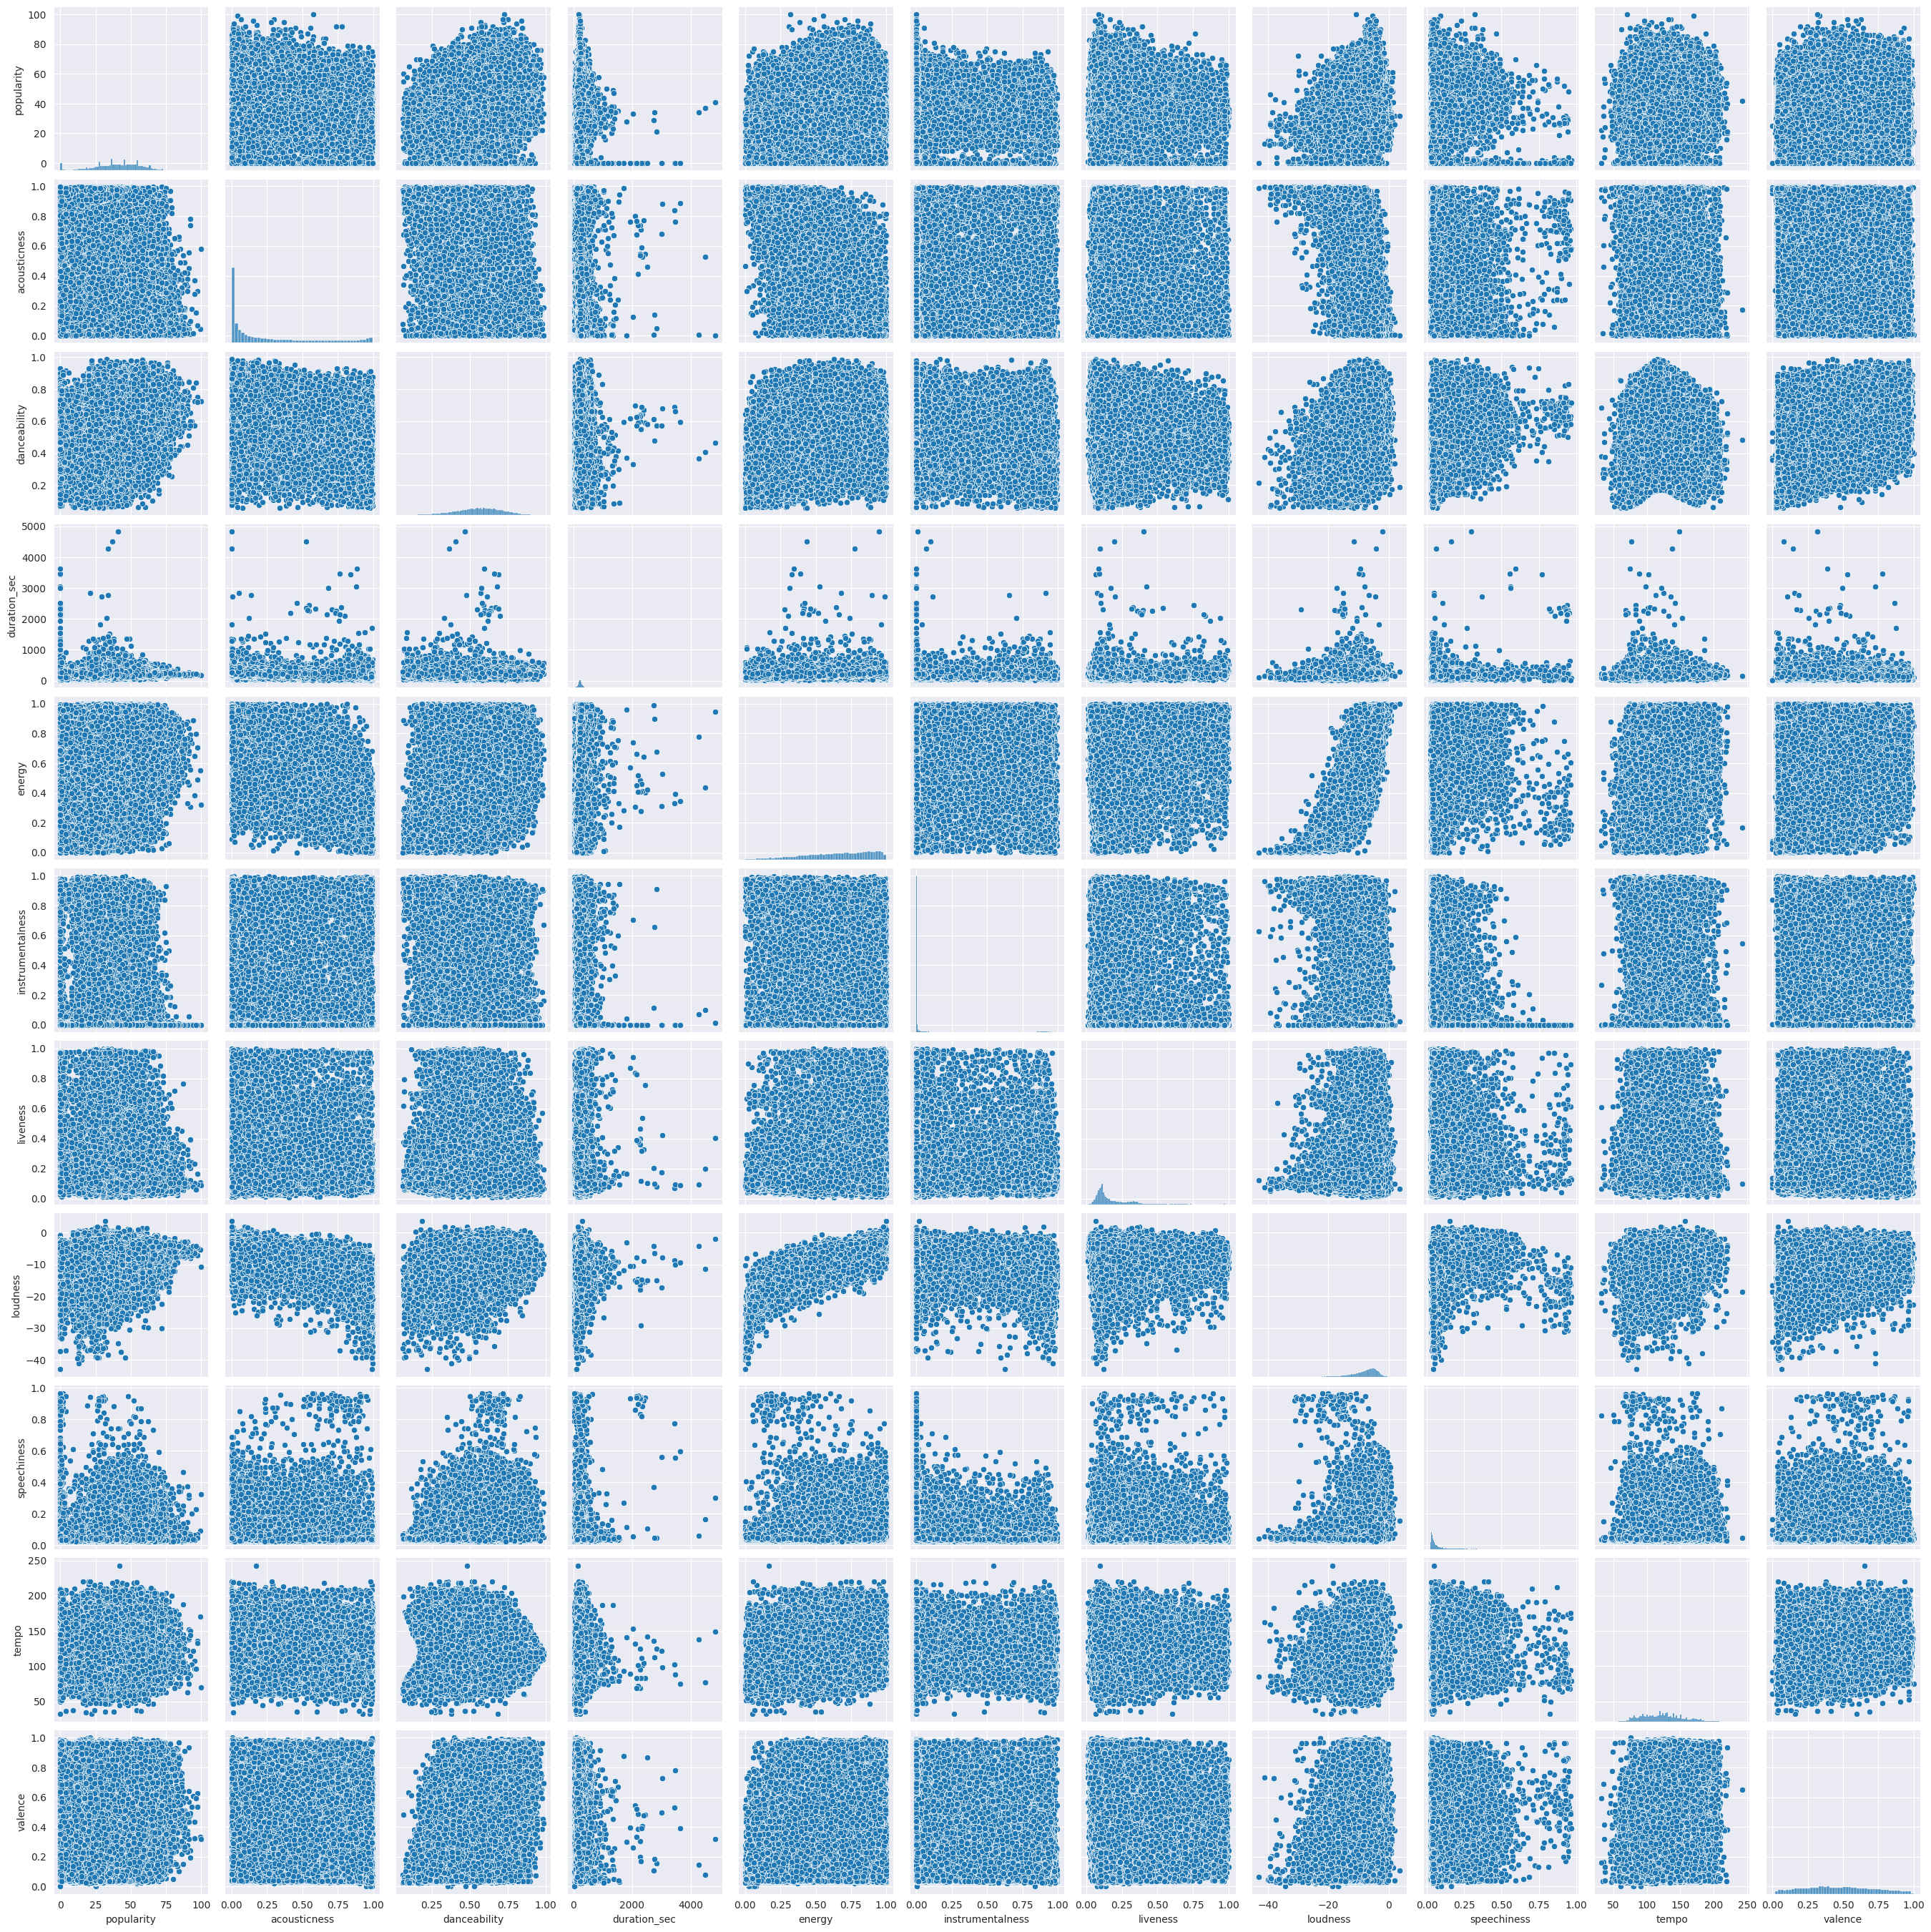

In [64]:
data_cols=data[['popularity','acousticness','danceability','duration_sec','energy','instrumentalness',
'liveness', 'loudness','speechiness', 'tempo', 'time_signature', 'valence']]
#To plot multiple pairwise bivariate distributions in a dataset, we can use the .pairplot()
sns.pairplot(data_cols)

In [81]:
#Top 5 Popular Artists And Visualization

data.shape


(58570, 16)

In [88]:
data.artist_name.nunique()

5776

In [102]:
top_5_artist =data.groupby('artist_name').count().sort_values('popularity',ascending = False)['popularity']
top_5_artist.head()

artist_name
Nobuo Uematsu        772
Capcom Sound Team    326
Dorothée             325
Yuki Hayashi         277
Chorus               275
Name: popularity, dtype: int64

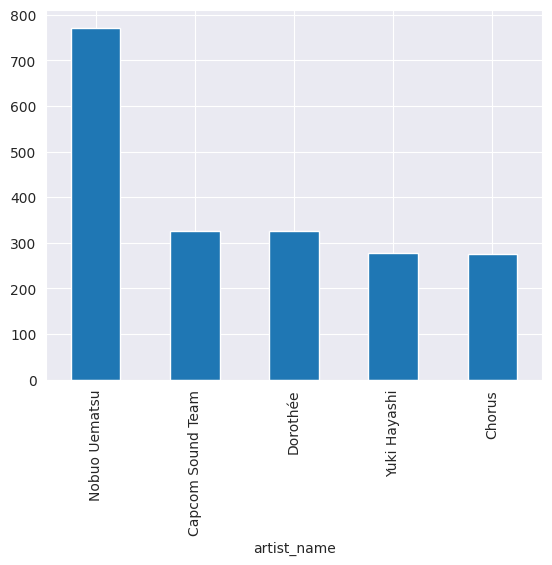

In [106]:
top_5_artist[:5].plot.bar()
plt.xlabel ='artist_name'
plt.ylabel ='popularity'

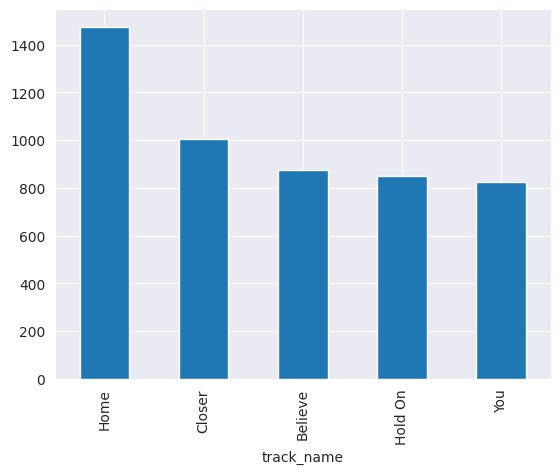

In [154]:
top_5_artist =data.groupby('track_name').sum().sort_values('popularity',ascending = False)['popularity']

top_5_songs[:5].plot.bar()
plt.xlabel ='artist_name'
plt.ylabel ='popularity'

In [191]:
# Top 5 Instrumentalness Songs
# data.head()
data[['track_name','instrumentalness']].sort_values('instrumentalness',ascending= False)[0:5]

track_name  instrumentalness
31144         Kingdom of Burmecia             0.997
34781              スリルのテーマ 〜サスペンス             0.996
22490                       Arena             0.994
34419                Sailing Ship             0.993
29326  Those Chosen by the Planet             0.993

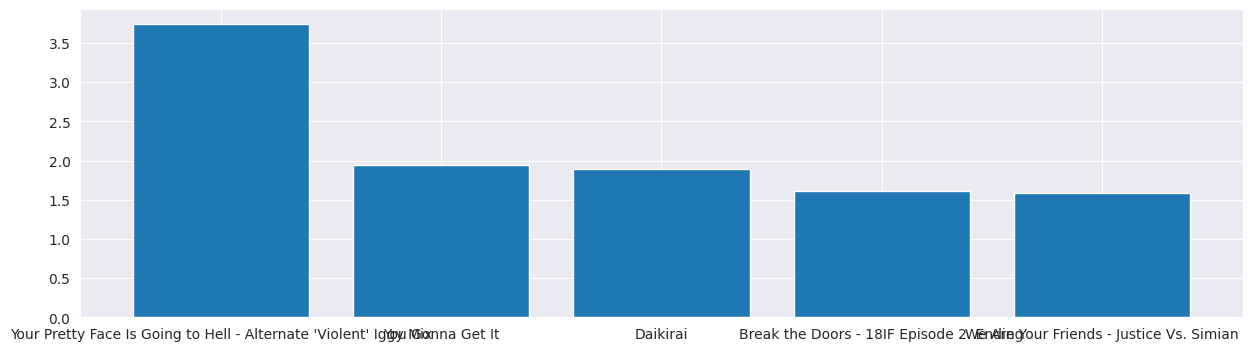

In [185]:
#Top 5 Loudest Tracks
top_5_loudest=data[['track_name','loudness']].sort_values('loudness',ascending = False)[:5]
plt.figure(figsize=(15,4))
plt.bar(top_5_loudest['track_name'][:5],top_5_loudest['loudness'][:5])
plt.xlabel='track_name'
plt.ylabel='loudness'
plt.show()

In [192]:
data[['track_name','loudness']].sort_values('loudness',ascending = False)[:5]

track_name  loudness
53203  Your Pretty Face Is Going to Hell - Alternate ...     3.744
53343                                   You Gonna Get It     1.949
28484                                           Daikirai     1.893
29314           Break the Doors - 18IF Episode 2. Ending     1.610
26091           We Are Your Friends - Justice Vs. Simian     1.585

In [200]:
# Top 5 Artist With Most danceability Songs
data.head()
data[['artist_name','danceability']].sort_values('danceability',ascending = False)[:5]

artist_name  danceability
26911            Quantic         0.987
23822                 Nu         0.985
24515  Kleintierschaukel         0.979
52174          T.K. Soul         0.978
40055              Malaa         0.978

In [219]:
# Top 5 Genres In Popularity
data.head()
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
data[['genre','popularity']].groupby('genre').count().sort_values('popularity',ascending=False)['popularity'][:5]


genre
Electronic     9377
Alternative    9263
Anime          8936
Dance          8701
Blues          8244
Name: popularity, dtype: int64

<Figure size 1000x500 with 0 Axes>

In [223]:
# Top 5 songs which are more energetic
# data.head()
data[['track_name','energy']].sort_values('energy',ascending= False)[:5]

track_name  energy
21942                        No Limit   0.999
27959               Burst the Gravity   0.999
31965  fortissimo-the ultimate crisis   0.999
30778                 eternal reality   0.999
24427                          Wicked   0.999

In [234]:
# Duration Of Songs In Different Genres
# data.head()
data[['genre','duration_sec']].groupby('genre').count().sort_values('duration_sec',ascending = False)


duration_sec
genre                    
Electronic           9377
Alternative          9263
Anime                8936
Dance                8701
Blues                8244
Folk                 4521
Country              4162
R&B                  2171
Movie                2088
Opera                 988
A Capella             119